Исследовательский анализ данных
Выбрать из каталога любой интересующий dataset и провести его анализ в вольном стиле

Датасет: * https://www.kaggle.com/datasets/octopusteam/full-hbo-max-dataset?resource=download

Датасет представляет собой коллекцию рейтингов фильмов и шоу, доступных на HBO Max.
(Daily-updated of the HBO Max Movies & TV Series Dataset)

Результат работы ->

Импорт:

In [1]:
%pip install numpy pandas seaborn matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

Вспомогательные функции:

In [3]:
def load_and_clean_dataset(file_path):
    df = pd.read_csv(file_path)
    print("Records found: ", len(df))
    df_cleaned = df.dropna().drop_duplicates()
    df_cleaned = df_cleaned.drop_duplicates(subset=['title'])
    return df_cleaned

def get_top_n_rated(df, content_type, n=10):
    df_filtered = df[df['type'] == content_type]
    top_n_rated = df_filtered.nlargest(n=n, columns=['imdbAverageRating', 'imdbNumVotes'], keep='all')
    return top_n_rated

def get_worst_n_rated(df, content_type, n=10):
    df_filtered = df[df['type'] == content_type]
    worst_n_rated = df_filtered.nsmallest(n=n, columns=['imdbAverageRating', 'imdbNumVotes'], keep='all')
    return worst_n_rated

def plot_top_n(top_n_rated, title, color, xlim=(8, 10)):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.barh(top_n_rated['title'], top_n_rated['imdbAverageRating'], color=color)
    ax.set_xlabel('Rating', fontsize=15)
    ax.set_ylabel('Titles', fontsize=15)
    ax.set_title(title, fontsize=20)
    ax.invert_yaxis()
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlim(xlim)
    plt.tight_layout()
    plt.show()

def plot_top_n_genres(df, genres, colors, xlim=(8, 10)):
    top_10_genres = df.sort_values(by=['imdbAverageRating', 'imdbNumVotes'], ascending=False)
    fig, axes = plt.subplots(1, len(genres), figsize=(15, 6))

    for i, genre in enumerate(genres):
        genre_data = top_10_genres[top_10_genres['genres'].str.contains(genre, case=False, na=False)]
        top_genre = genre_data.head(10)
        axes[i].barh(top_genre["title"], top_genre["imdbAverageRating"], color=colors[i])
        axes[i].set_xlabel('Rating')
        axes[i].set_ylabel('Titles', fontsize=15)
        axes[i].set_title(f'Top 10 {genre}')
        axes[i].invert_yaxis()
        axes[i].set_xlim(xlim)

    fig.suptitle('Top 10 Rated Titles by Genre', fontsize=18)
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()

def plot_aggregated_n(n_movies, n_shows, plot_title='Plot Title', colors=('yellow', 'lightgreen'), xlim=(8, 10)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Plot top N movies
    axes[0].barh(n_movies['title'], n_movies['imdbAverageRating'], color=colors[0])
    axes[0].set_xlabel('Rating', fontsize=15)
    axes[0].set_ylabel('Titles', fontsize=15)
    axes[0].set_title('Movies', fontsize=20)
    axes[0].invert_yaxis()
    axes[0].tick_params(axis='y', labelsize=14)
    axes[0].set_xlim(xlim)

    # Plot top N shows
    axes[1].barh(n_shows['title'], n_shows['imdbAverageRating'], color=colors[1])
    axes[1].set_xlabel('Rating', fontsize=15)
    axes[1].set_title('Shows', fontsize=20)
    axes[1].invert_yaxis()
    axes[1].tick_params(axis='y', labelsize=14)
    axes[1].set_xlim(xlim)

    # Show plot
    fig.suptitle(plot_title, fontsize=18)
    plt.tight_layout(rect=(0, 0, 1, 0.96))  # Adjust rect to make space for the super title
    plt.show()

def plot_word_cloud(df):
    stop_words_list = set(STOPWORDS)
    counts = Counter(df["genres"].dropna().apply(lambda x: str(x)))
    wcc = WordCloud(
        background_color="black",
        width=1600, height=800,
        max_words=2000,
        stopwords=stop_words_list
    )
    wcc.generate_from_frequencies(counts)
    plt.figure(figsize=(10, 5), facecolor='k')
    plt.imshow(wcc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

Загружаем dataset:

In [4]:
print('Loading...')
df_cleaned = load_and_clean_dataset('dataset/hbo_max_dataset.csv')

Loading...
Records found:  7199


Top 10 Rated Movies and Shows:

Top 10 rated movies:
                                                  title   type  \
73                             The Shawshank Redemption  movie   
4982                                    Celebrity Habla  movie   
61                                        The Godfather  movie   
4437                                         Splashback  movie   
36                                      The Dark Knight  movie   
28        The Lord of the Rings: The Return of the King  movie   
62                                The Godfather Part II  movie   
183                                        Pulp Fiction  movie   
26    The Lord of the Rings: The Fellowship of the Ring  movie   
1215                                          Inception  movie   

                         genres  releaseYear      imdbId  imdbAverageRating  \
73                        Drama       1994.0   tt0111161                9.3   
4982                Documentary       2009.0   tt1647445                9.3   
61             

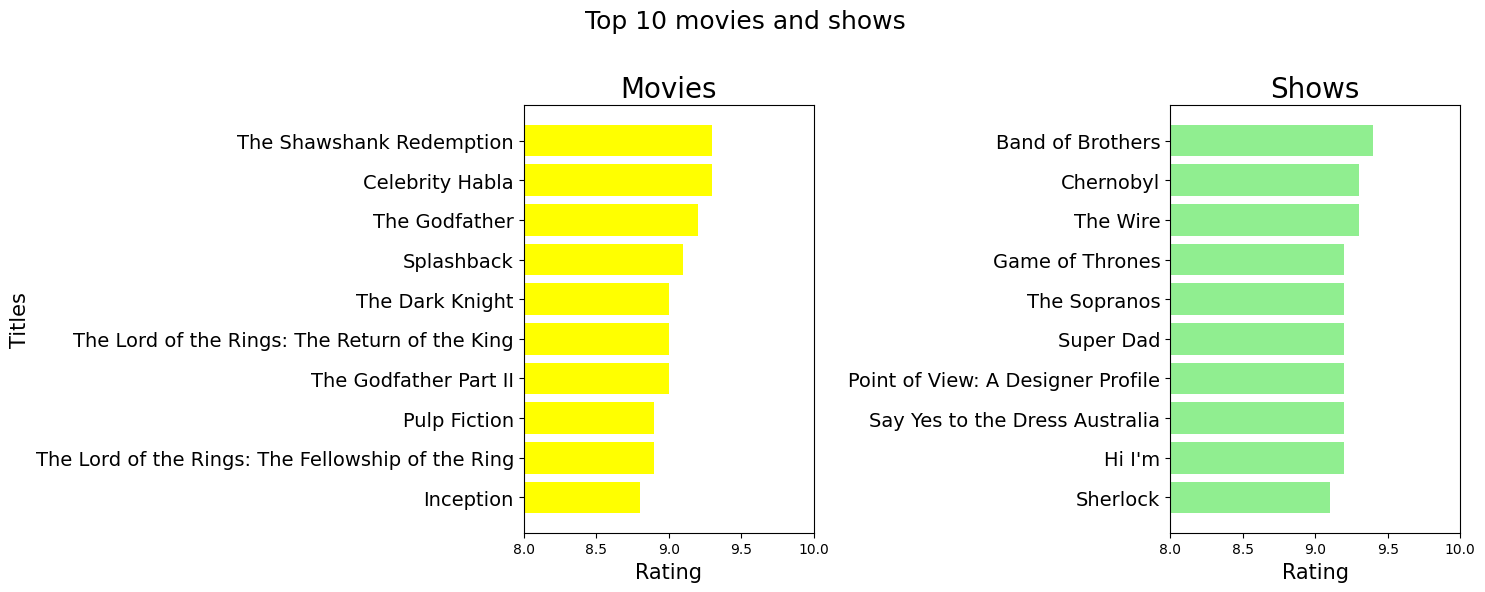

In [5]:
# Top 10 rated movies and shows
top_10_rated_movies = get_top_n_rated(df_cleaned, 'movie')
top_10_rated_shows = get_top_n_rated(df_cleaned, 'tv')

print("Top 10 rated movies:")
print(top_10_rated_movies)
print("Top 10 rated shows:")
print(top_10_rated_shows)

# Plot top 10 rated movies and shows
plot_aggregated_n(top_10_rated_movies, top_10_rated_shows, plot_title='Top 10 movies and shows')

Worst 10 Rated Movies and Shows:

Worst 10 rated movies:
                                         title   type  \
3987           Harry & Meghan: The Revelations  movie   
2215                   Justin Bieber's Believe  movie   
4109  Me contro Te - il Film: Missione Giungla  movie   
3844   Me contro Te - Il film: Persi nel tempo  movie   
2742                                El paseo 3  movie   
2150                           Virginity Sucks  movie   
1505                          Agent Toby Barks  movie   
4509           Megamind vs. The Doom Syndicate  movie   
549                                      Gigli  movie   
2179                                The Trip 2  movie   

                            genres  releaseYear      imdbId  \
3987            Documentary, Drama       2021.0  tt14534410   
2215            Documentary, Music       2013.0   tt3165608   
4109               Family, Fantasy       2023.0  tt21934046   
3844                Comedy, Family       2022.0  tt16899302   
2742                        Comedy

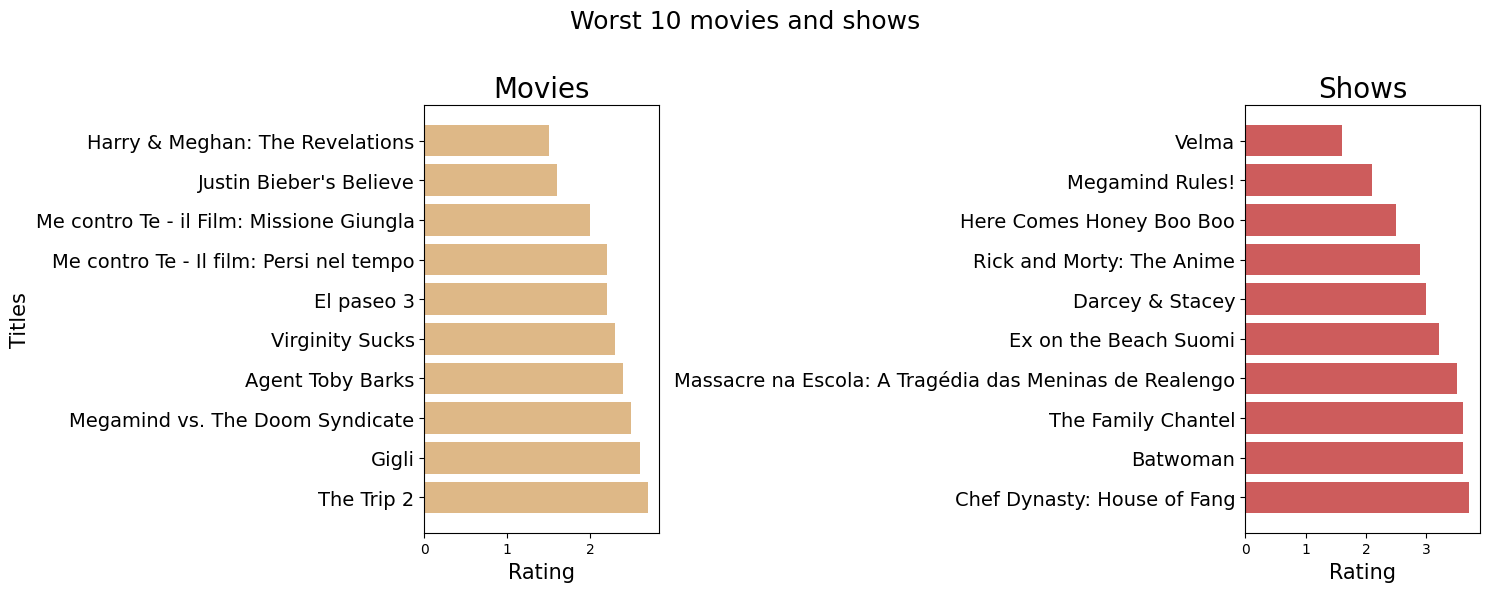

In [6]:
# Worst 10 rated movies and shows
top_10_worst_movies = get_worst_n_rated(df_cleaned, 'movie')
top_10_worst_shows = get_worst_n_rated(df_cleaned, 'tv')

print("Worst 10 rated movies:")
print(top_10_worst_movies)
print("Worst 10 rated shows:")
print(top_10_worst_shows)

# Plot aggregated worst 10 rated movies and shows
plot_aggregated_n(top_10_worst_movies, top_10_worst_shows, plot_title='Worst 10 movies and shows',
                  colors=('burlywood', 'indianred'), xlim=None)

TOP 10 по жанрам:

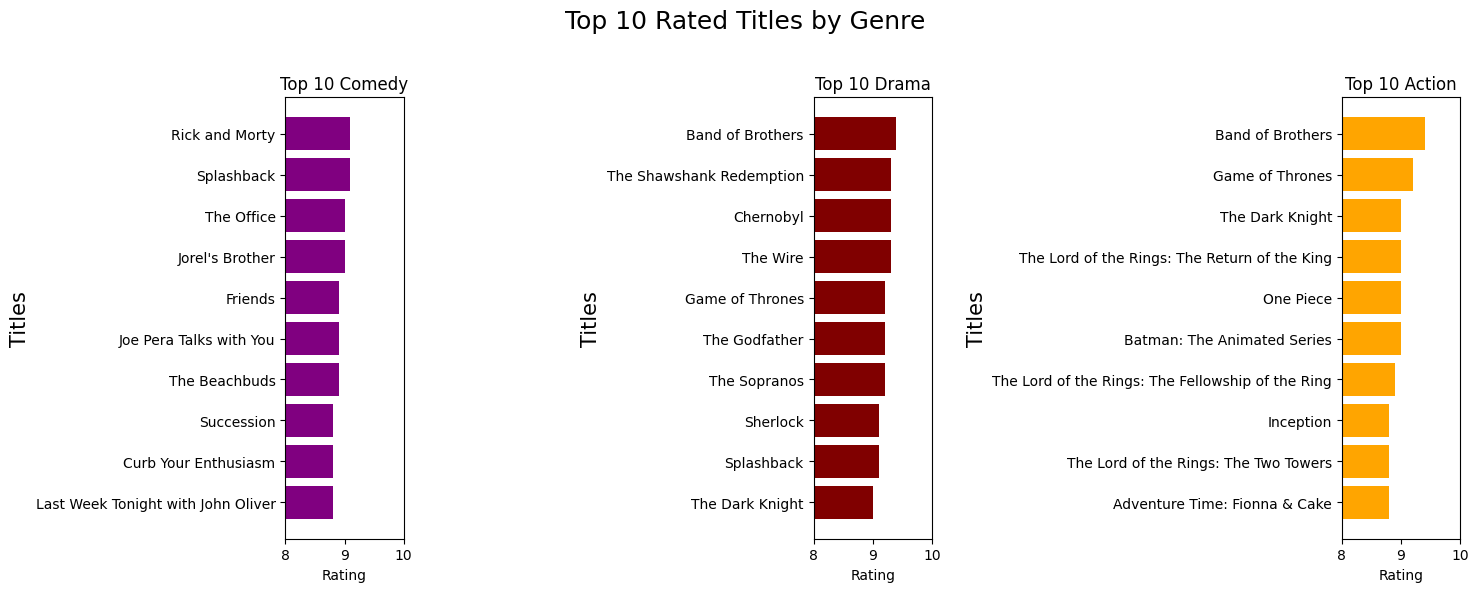

In [7]:
# Top 10 comedies, dramas, action
genres = ['Comedy', 'Drama', 'Action']
colors = ['purple', 'maroon', 'orange']
plot_top_n_genres(df_cleaned, genres, colors)

Облако тэгов:

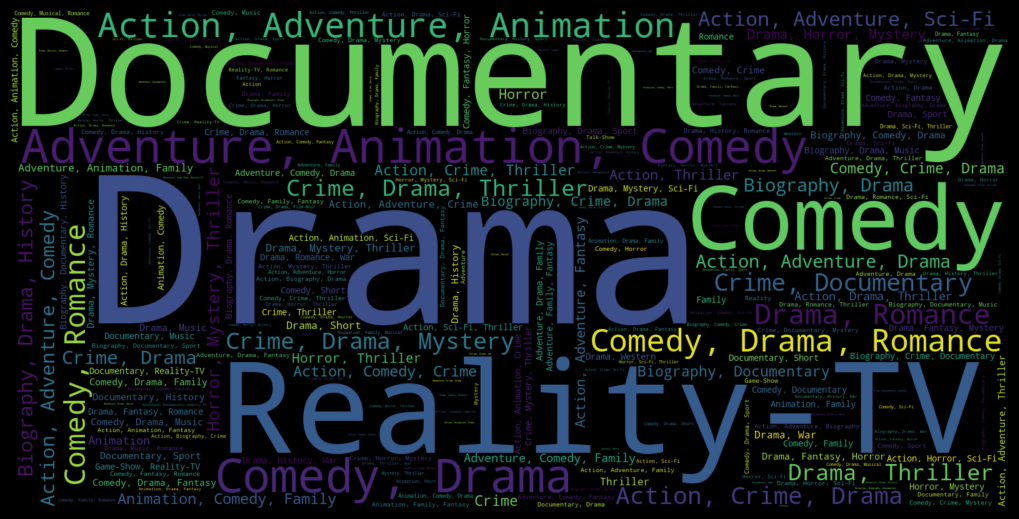

In [8]:
# Plot word cloud
plot_word_cloud(df_cleaned)